In [12]:
using Plots

In [13]:
p = 2
n = 3 

3

Definisco il vettore dei nodi con dimensione m + 1 con m = p + n + 1

I primi p + 1 elementi devono essere uguali a 0

Gli ultimi p + 1 devono essere uguali a 1

In [14]:
U = [0.0 0.0 0.0 0.5 1.0 1.0 1.0]

1×7 Array{Float64,2}:
 0.0  0.0  0.0  0.5  1.0  1.0  1.0

Controllo che il vettore sia corretto.

In [15]:
function check_knots(U)
    
    for i=1:p+1
        @assert U[i] == 0.0
    end

    for i=size(U,2):-1:size(U,2) - p
        @assert U[i] == 1.0
    end
    
end

check_knots (generic function with 1 method)

In [16]:
check_knots(U)

Definisco la matrice dei punti di controllo, che deve avere dimensione n + 1.

In [17]:
P = [0.0 0.5522 1.0 1.0; 1.0 1.0 0.5522 0.0]

2×4 Array{Float64,2}:
 0.0  0.5522  1.0     1.0
 1.0  1.0     0.5522  0.0

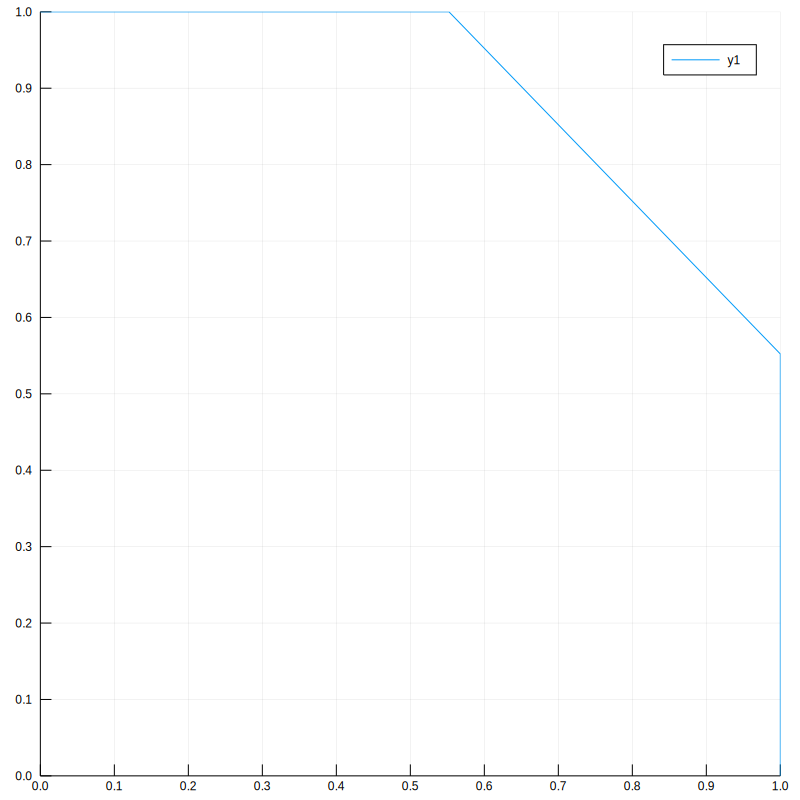

In [44]:
plot(P[1, :], P[2, :], xlims = (0, 1.0), ylims = (0, 1), xticks = 0:0.1:1, yticks = 0:0.1:1, size=(800,800))

Definisco un metodo per trattare l'indicizzazione degli array in Julia a partire da 1

In [29]:
function T(U, i)

	if i+1 <= size(U)[2]
		return U[i+1]
	else
		return 0.0
	end

end

T (generic function with 1 method)

In [19]:
T(U, 0)

0.0

In [32]:
T(U,6)

1.0

Definisco la funzione che ritorna una base con argomenti:


u -> parametro

U -> vettore dei nodi

i, j -> indici

In [34]:
function N(u, U, i, j)

	if j <= 0
		if u >= T(U, i) && u < T(U, i+1)
			return 1.0
		else
			return 0.0
		end
	end

	if  (T(U, i+j+1) - T(U, i+1)) == 0 && (T(U, i+j) - T(U,i)) == 0
		return 0.0
	else

		if (T(U, i+j+1) - T(U, i+1)) == 0
			return ((u - T(U, i)) / (T(U, i+j) - T(U,i))) * N(u, U, i, j-1)
		end

		if  (T(U, i+j) - T(U,i)) == 0
			return ((T(U, i+j+1) - u) / (T(U, i+j+1) - T(U, i+1))) * N(u, U, i+1, j-1)
		end

	end

	return ((u - T(U, i)) / (T(U, i+j) - T(U,i))) * N(u, U, i, j-1) + ((T(U, i+j+1) - u) / (T(U, i+j+1) - T(U, i+1))) * N(u, U, i+1, j-1)

end

N (generic function with 1 method)

In [37]:
S = (u, U, n, p) -> sum([N(u, U, i, p) * P[:, i+1] for i=0:n])

#11 (generic function with 1 method)

In [38]:
X = [S(u, U, n, p)[1] for u in 0:0.001:1]

Y = [S(u, U, n, p)[2] for u in 0:0.001:1]

1001-element Array{Float64,1}:
 1.0                 
 0.9999991044000001  
 0.9999964176        
 0.9999919396        
 0.9999856704        
 0.99997761          
 0.9999677584000001  
 0.9999561156        
 0.9999426816        
 0.9999274564        
 0.99991044          
 0.9998916324        
 0.9998710336        
 ⋮                   
 0.02413790280000002 
 0.021956680000000017
 0.019772830800000016
 0.017586355200000018
 0.015397253200000014
 0.013205524800000012
 0.011011170000000011
 0.00881418880000001 
 0.006614581200000006
 0.004412347200000005
 0.002207486800000002
 0.0                 

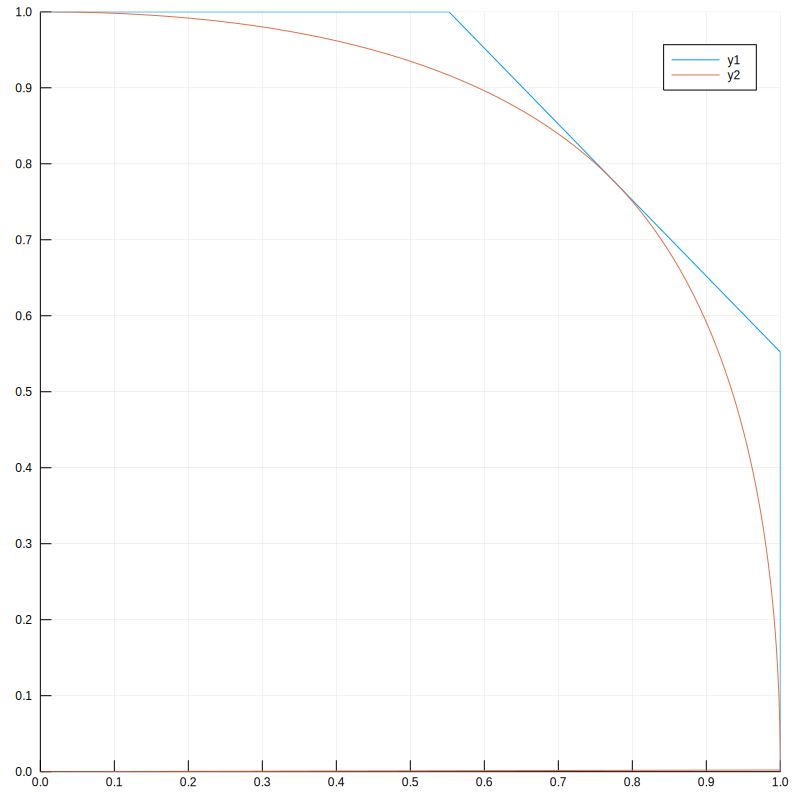

In [41]:
plot([P[1, :], X], [P[2, :], Y], xlims = (0, 1.0), ylims = (0, 1), xticks = 0:0.1:1, yticks = 0:0.1:1, size=(800,800))

In [46]:
lista = []

function N(u, U, i, j, add=true)

	if add
		push!(lista, (i, j))
	end

	if j <= 0
		if u >= T(U, i) && u < T(U, i+1)
			return 1.0
		else
			return 0.0
		end
	end

	if  (T(U, i+j+1) - T(U, i+1)) == 0 && (T(U, i+j) - T(U,i)) == 0
		return 0.0
	else

		if (T(U, i+j+1) - T(U, i+1)) == 0
			return ((u - T(U, i)) / (T(U, i+j) - T(U,i))) * N(u, U, i, j-1, add)
		end

		if  (T(U, i+j) - T(U,i)) == 0
			return ((T(U, i+j+1) - u) / (T(U, i+j+1) - T(U, i+1))) * N(u, U, i+1, j-1, add)
		end

	end

	return ((u - T(U, i)) / (T(U, i+j) - T(U,i))) * N(u, U, i, j-1, add) + ((T(U, i+j+1) - u) / (T(U, i+j+1) - T(U, i+1))) * N(u, U, i+1, j-1, add)

end

N (generic function with 2 methods)

In [47]:
test = [ S(0.5, U, n, p) for i=0:n ]

4-element Array{Array{Float64,1},1}:
 [0.7761, 0.7761]
 [0.7761, 0.7761]
 [0.7761, 0.7761]
 [0.7761, 0.7761]

In [48]:
curves_Xs = [ 0:0.001:1 ] 
curves_Ys = [[ N(u, U, i, j, false) for u=0:0.001:1 ] for (i,j) in lista] 

72-element Array{Array{Float64,1},1}:
 [1.0, 0.996004, 0.992016, 0.988036, 0.984064, 0.9801, 0.976144, 0.972196, 0.968256, 0.964324  …  0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]                                
 [1.0, 0.998, 0.996, 0.994, 0.992, 0.99, 0.988, 0.986, 0.984, 0.982  …  -0.0, -0.0, -0.0, -0.0, -0.0, -0.0, -0.0, -0.0, -0.0, -0.0]                                                
 [1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0  …  0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]                                                                           
 [0.0, 0.003994, 0.007976, 0.011946, 0.015904, 0.01985, 0.023784, 0.027706, 0.031616, 0.035514  …  0.000162, 0.000128, 9.8e-5, 7.2e-5, 5.0e-5, 3.2e-5, 1.8e-5, 8.0e-6, 2.0e-6, 0.0]
 [1.0, 0.998, 0.996, 0.994, 0.992, 0.99, 0.988, 0.986, 0.984, 0.982  …  -0.0, -0.0, -0.0, -0.0, -0.0, -0.0, -0.0, -0.0, -0.0, -0.0]                                                
 [1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0  …  0.0, 0.

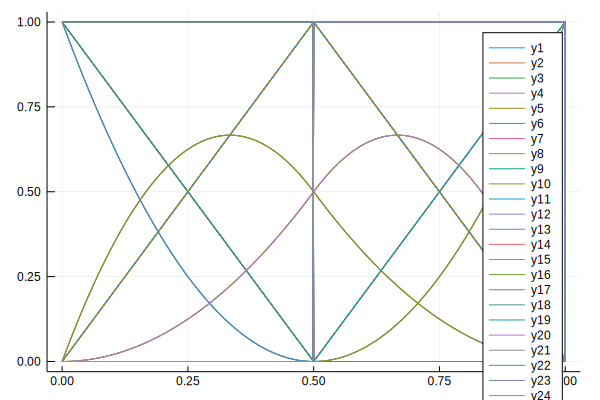

In [49]:
plot(curves_Xs, curves_Ys)